## Name: Arun Kothari

# Importing the libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Reading the CSV

In [12]:
df = pd.read_csv("Iris.csv")
df.drop(['Id'], inplace=True, axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
X = df.iloc[:, 0:-1]

# Some GRAPHS

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

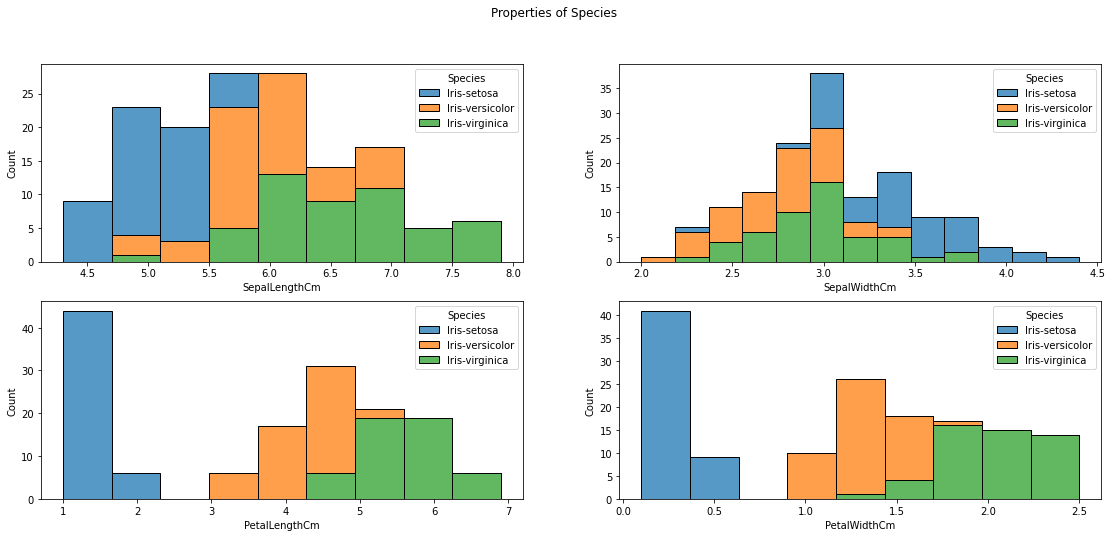

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(19,8))
fig.suptitle('Properties of Species')
sns.histplot(x='SepalLengthCm',data=df,hue='Species',multiple="stack", ax=axes[0, 0])
sns.histplot(x='SepalWidthCm',data=df,hue='Species',multiple="stack", ax=axes[0, 1])
sns.histplot(x='PetalLengthCm',data=df,hue='Species',multiple="stack", ax=axes[1, 0])
sns.histplot(x='PetalWidthCm',data=df,hue='Species',multiple="stack", ax=axes[1, 1])

- This plot shows that SepalLength of :
        -- setosa is mostly between 4.8 to 5.5
        -- versicolor is mostly between 5.5 to 6.25
        -- virginica is evenly distributed between 5.5 to 7.75
        
- This plot shows that SepalWidth of :
        -- setosa is mostly between 2.5 to 3.35
        -- versicolor is mostly between 3 to 3.25
        -- virginica is unevenly distributed between 2.5 to 3.75

        
- This plot shows that PetalLength of :
        -- setosa is mostly 1
        -- versicolor is mostly between 3 to 5
        -- virginica is between 5 to 6

- This plot shows that PetalWidth of :
        -- setosa is mostly between 0.25 to 0.75
        -- versicolor is mostly between 0.9 to 1.5
        -- virginica is mostly between 1.75 to 2.5
 
 ----------------------------------------------------

Using **Elbow** method to find the number of clusters

*CLUSTER = 3*

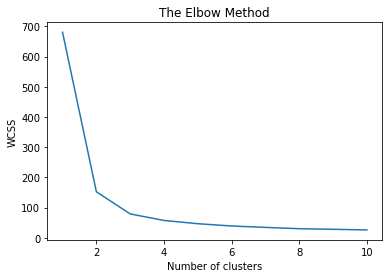

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the model

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

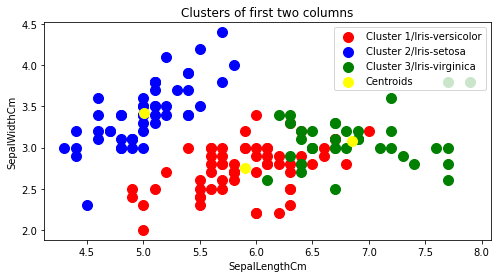

In [17]:
plt.figure(figsize=(8, 4))

plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1/Iris-versicolor')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2/Iris-setosa')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3/Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of first two columns')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [20]:
print("ENTER VALUE IN CM")
SepalLength = float(input("SepalLength: "))
if (df["SepalLengthCm"].min()-1 > SepalLength or SepalLength > df["SepalLengthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["SepalLengthCm"].min()-1)+" and "+str(df["SepalLengthCm"].max()+1))

SepalWidth = float(input("SepalWidth: "))
if (df["SepalWidthCm"].min()-1 > SepalWidth or SepalWidth > df["SepalWidthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["SepalWidthCm"].min()-1)+" and "+str(df["SepalWidthCm"].max()+1))

PetalLength = float(input("PetalLength: "))
if (df["PetalLengthCm"].min()-1 > PetalLength or PetalLength > df["PetalLengthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["PetalLengthCm"].min()-1)+" and "+str(df["PetalLengthCm"].max()+1))

PetalWidth = float(input("PetalWidth: "))
if (df["PetalWidthCm"].min()-1 > PetalWidth or PetalWidth > df["PetalWidthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["PetalWidthCm"].min()-1)+" and "+str(df["PetalWidthCm"].max()+1))


ENTER VALUE IN CM
SepalLength: 4
SepalWidth: 2
PetalLength: 1
PetalWidth: 3


In [21]:
prediction = kmeans.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print("The prediction is: ")

if prediction == 0:
    print("Iris-versicolor")
elif prediction == 1:
    print('Iris-setosa')
else:
    print('Iris-virginica')

The prediction is: 
Iris-setosa
